# Assignment #01

# **Question 1: Image Convolution and Gaussian Filter**

## Importing Necessary Libraries

In [513]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.metrics import structural_similarity as ssim
from PIL import Image

## Common Functions 
The below convolve function performs convolution on a given image using a specified kernel. It supports both 2D and RGB image types. The function pads the image, flips the kernel, and applies convolution by iterating through the image pixels, returning the convolved image as output.

In [514]:
def convolve(image, kernel, convolution_type):
    
    kernel = np.flipud(np.fliplr(kernel))
    xImgShape = any
    yImgShape = any
    zImagShape = 1 # Basically Channel
    xKernShape = any
    yKernShape = any
    
    if(convolution_type == '2d'):
        xImgShape, yImgShape = image.shape
        xKernShape, yKernShape = kernel.shape
    else:
        xImgShape, yImgShape, zImagShape = image.shape
        xKernShape, yKernShape = kernel.shape   

    padding_x = xKernShape // 2
    padding_y = yKernShape // 2

    # Initialize output image
    if(convolution_type == '2d'):
        imagePadded = np.pad(image, ((padding_x, padding_x), (padding_y, padding_y)), mode='constant', constant_values=0)
        convolved_image = np.zeros((xImgShape, yImgShape))
    else:
        convolved_image = np.zeros((xImgShape, yImgShape, zImagShape))
        imagePadded = np.pad(image, ((padding_x, padding_x), (padding_y, padding_y), (0, 0)), mode='constant', constant_values=0)
        
    if(convolution_type == '2d'):
        for x in range(xImgShape):
            for y in range(yImgShape):
                convolved_image[x, y] = (kernel * imagePadded[x:x + xKernShape, y:y + yKernShape]).sum()
    else:
        for x in range(xImgShape):
            for y in range(yImgShape):
                for c in range(zImagShape):
                    convolved_image[x, y, c] = (kernel * imagePadded[x:x + xKernShape, y:y + yKernShape, c]).sum()
    
    return convolved_image

The plotImage function displays multiple images in a single row, supporting both grayscale and RGB images with titles.

In [515]:
def plotImage(images):
    
    plt.figure(figsize=(15, 5))
    i = 1
    for image in images:
        plt.subplot(1, 3, i)
        if(image[2] == 'gray'):
            plt.imshow(image[0],cmap=image[2])
        else:
            plt.imshow(image[0])    
        plt.title(image[1])
        plt.axis("off")
        i = i + 1

    plt.show()

### 1a. Grayscale Image Convolution with 2D Filter (2 Points)

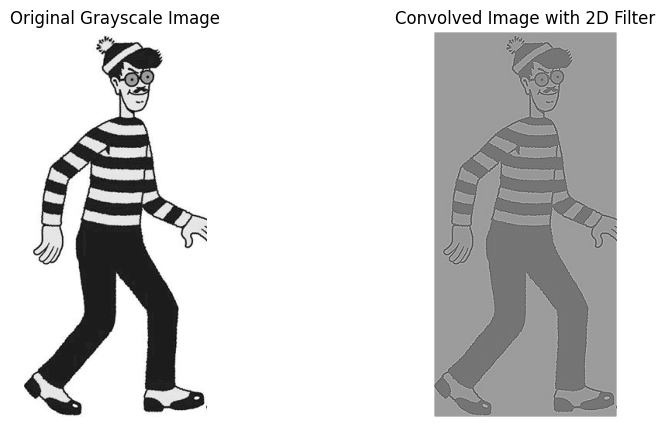

In [516]:
imageGrey = cv2.imread("template.png", cv2.IMREAD_GRAYSCALE)

sharp_kernel = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])

grey_convolve = convolve(image=imageGrey, kernel=sharp_kernel,convolution_type="2d")

plotImage([[imageGrey,"Original Grayscale Image","gray"],[grey_convolve,"Convolved Image with 2D Filter","gray"]])

### 1b. RGB Image Convolution with 3D Filter (1 Point)

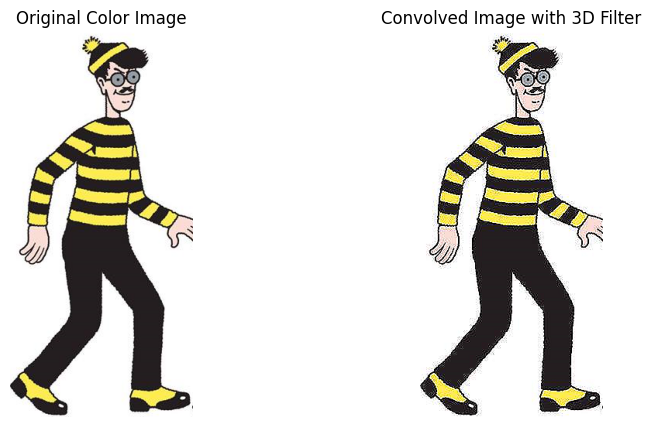

In [517]:
imageColor = cv2.imread("template.png", cv2.IMREAD_COLOR)
imageColor = cv2.cvtColor(imageColor, cv2.COLOR_BGR2RGB)

sharp_kernel = np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])

convolved_rgb = np.clip(convolve(image=imageColor, kernel=sharp_kernel,convolution_type="3d"), 0, 255).astype(np.uint8)

plotImage([[imageColor,"Original Color Image","3d"],[convolved_rgb,"Convolved Image with 3D Filter","3d"]])

### Convolve the attached waldo.png with a (2D) Gaussian filter with σ = 1 and visualize the result (display the result of the convolution). You can use built-in functions for convolution. (1 Point)

libpng warning: iCCP: cHRM chunk does not match sRGB


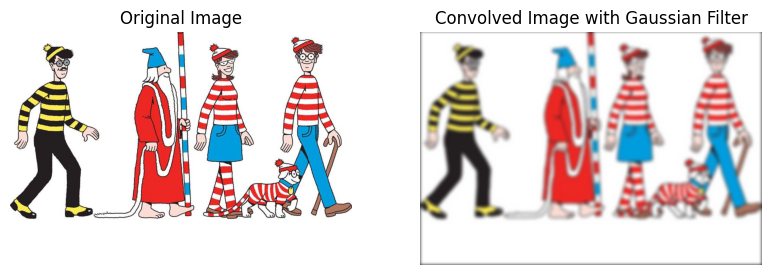

In [518]:
imageColor = cv2.imread("waldo.png", cv2.IMREAD_COLOR)
imageColor = cv2.cvtColor(imageColor, cv2.COLOR_BGR2RGB)

def gaussian_kernel_2d(kernel_size, sigma=1.0):
    # This is 1D formula
    # f(x) = (1 / (sigma * sqrt(2 * pi))) * exp(- (x^2) / (2 * sigma^2))
    kernel = np.zeros((kernel_size, kernel_size))
    center = (kernel_size - 1) / 2.
    constant = 1 / (sigma * np.sqrt(2 * np.pi))
    
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - center
            y = j - center
            kernel[i, j] = constant * np.exp(-0.5 * ((x**2 + y**2) / sigma**2))
    
    kernel /= kernel.sum()
    
    return kernel

gaussian_kernel = gaussian_kernel_2d(21, 5)

convolved_rgb_gaussian = np.clip(convolve(image=imageColor, kernel=gaussian_kernel,convolution_type="3d"), 0, 255).astype(np.uint8)

plotImage([[imageColor,"Original Image","3d"],[convolved_rgb_gaussian,"Convolved Image with Gaussian Filter","3d"]])

## Question 2: Implement Canny Edge Detection from Scratch

### 2a. Compute Gradient Magnitude for Images. Compute magnitude of gradients for the attached images waldo.png and template.png. (1 Point)

In [519]:

def compute_gradient_magnitude(image):

    convolved = np.zeros(image.shape)
    G_x = np.zeros(image.shape)
    G_y = np.zeros(image.shape)
    
    size = image.shape
    
    # Kernel for Sobel
    #  x         y
    # -1 0 1    -1 -2 -1
    # -2 0 2     0  0  0
    # -1 0 1     1  2  1
    
    kernel_x = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]))
    kernel_y = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]))

    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            G_x[i, j] = np.sum(np.multiply(image[i - 1 : i + 2, j - 1 : j + 2], kernel_x))
            G_y[i, j] = np.sum(np.multiply(image[i - 1 : i + 2, j - 1 : j + 2], kernel_y))
            
    convolved = np.sqrt(np.square(G_x) + np.square(G_y))
    convolved = np.multiply(convolved, 255.0 / convolved.max())
    
    angles = np.rad2deg(np.arctan2(G_y, G_x))
    angles[angles < 0] += 180
    convolved = convolved.astype('uint8')
    
    return convolved, angles  

image_path = 'template.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
magnitude , angle = compute_gradient_magnitude(gray_image)
print('Magnitude of template.png',magnitude)

image_path = 'waldo.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
magnitude , angle = compute_gradient_magnitude(gray_image)
print('Magnitude of waldo.png',magnitude)



Magnitude of template.png [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 6 0]
 [0 0 0 ... 4 2 0]
 [0 0 0 ... 0 0 0]]


libpng warning: iCCP: cHRM chunk does not match sRGB


Magnitude of waldo.png [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 2b. MyCannyEdgeDetector Function (3 Point)

### Key Stages of Canny Edge Detection (Explanation)

Explain the key stages of the Canny edge detection algorithm in detail. Your explanation should cover:

1. **Noise Reduction**
2. **Gradient Calculation**
3. **Non-Maximum Suppression**
5. **Edge Tracking by Hysteresis**

Write your response in the markdown cell below.

#### 1. Gaussian Blur:

The first step in the MyCannyEdgeDetector function is to apply a Gaussian blur to the input image using the apply_gaussian_blur function. A Gaussian blur helps smooth the image and reduces noise or small fluctuations in pixel intensity. This is crucial because noise can cause false edges to be detected. The blurring is done by using a mathematical filter called a Gaussian kernel, which gives more weight to the pixels near the center and less weight to those farther away. By convolving the image with this kernel, we effectively blur the image, softening the edges and making it easier to detect true edges later in the process. The parameters kernel_size and sigma control the size of the blur and how much smoothing is applied. A larger sigma value results in a stronger blur.

#### 2. Gradient Calculation:

After the image is smoothed, the function calculates the gradient magnitude and angle of the image using the compute_gradient_magnitude function. This step is important for detecting where the image changes sharply, which usually indicates an edge. The function uses the Sobel operator, which applies two filters: one to detect horizontal changes (G_x) and another to detect vertical changes (G_y). By combining these changes, the function calculates the gradient magnitude, which shows how strong the edge is, and the gradient angle, which shows the direction of the edge. The magnitude tells us how intense the edge is, while the angle helps us understand the orientation of the edge, which is important for the next step.

#### 3. Non-Maximum Suppression:

In this step, the non_maximum_suppression function is used to refine the edges. When edges are detected, they can be thick or blurry, which makes it hard to pinpoint the exact location of the edge. Non-maximum suppression solves this by keeping only the strongest edges and removing the weaker ones. It works by looking at the gradient magnitude of each pixel and comparing it to its neighbors in the direction of the gradient angle. If the current pixel’s gradient is the strongest in its direction, it is kept; otherwise, it is suppressed (set to zero). This process makes the edges thinner and more precise, ensuring only the most significant parts of the edges are retained for further processing.

#### 4. Hysteresis Thresholding:

The final step in the Canny edge detection process is applying hysteresis thresholding, using the hysteresis_thresholding function. In this step, two thresholds are used: low_threshold and high_threshold. Pixels with gradient magnitudes above the high threshold are considered strong edges, and those between the low and high thresholds are considered weak edges. However, weak edges are only kept if they are connected to strong edges; otherwise, they are discarded. This ensures that only meaningful edges are retained, while noise or weak edges that do not contribute to the overall structure are removed. The result is a clean, binary edge map where the remaining pixels represent the detected edges of the image.

### Load the image

In [520]:
image_path = 'test_image.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#### Noise Reduction (Gaussian Blur)

In [521]:
def apply_gaussian_blur(img, kernel_size=5 , sigma=1):
    gaussian_kernel = gaussian_kernel_2d(kernel_size, sigma)
    smoothed_image = np.clip(convolve(image=img, kernel=gaussian_kernel,convolution_type="2d"), 0, 255).astype(np.uint8)
    return smoothed_image

#### Gradient Calculation (using Sobel filters)

In [522]:
def calculate_gradients(img):
    return compute_gradient_magnitude(img)

#### Function for Non-Maximum Suppression

In [523]:
def non_maximum_suppression(gradient_magnitude,gradient_angle):
    size = gradient_magnitude.shape
    suppressed = np.zeros(size)
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            if (0 <= gradient_angle[i, j] < 22.5) or (157.5 <= gradient_angle[i, j] <= 180):
                value_to_compare = max(gradient_magnitude[i, j - 1], gradient_magnitude[i, j + 1])
            elif (22.5 <= gradient_angle[i, j] < 67.5):
                value_to_compare = max(gradient_magnitude[i - 1, j - 1], gradient_magnitude[i + 1, j + 1])
            elif (67.5 <= gradient_angle[i, j] < 112.5):
                value_to_compare = max(gradient_magnitude[i - 1, j], gradient_magnitude[i + 1, j])
            else:
                value_to_compare = max(gradient_magnitude[i + 1, j - 1], gradient_magnitude[i - 1, j + 1])
            
            if gradient_magnitude[i, j] >= value_to_compare:
                suppressed[i, j] = gradient_magnitude[i, j]
    suppressed = np.multiply(suppressed, 255.0 / suppressed.max())
    return suppressed
    


#### Function for Hysteresis Thresholding

In [524]:
def hysteresis_thresholding(suppressed_image, low_threshold, high_threshold):
    size = suppressed_image.shape
    result = np.zeros(size)
    
    weak_x, weak_y = np.where((suppressed_image > low_threshold) & (suppressed_image <= high_threshold))
    strong_x, strong_y = np.where(suppressed_image >= high_threshold)
    
    result[strong_x, strong_y] = high_threshold
    result[weak_x, weak_y] = low_threshold
    
    dx = np.array([-1, -1, 0, 1, 1, 1, 0, -1])
    dy = np.array([0, 1, 1, 1, 0, -1, -1, -1])
    
    while len(strong_x):
        # Basically take current new pixel
        x = strong_x[0]
        y = strong_y[0]
        strong_x = np.delete(strong_x, 0)
        strong_y = np.delete(strong_y, 0)
        
        for direction in range(len(dx)):
            new_x = x + dx[direction]
            new_y = y + dy[direction]
            
            if (0 <= new_x < size[0]) and (0 <= new_y < size[1]):
                if result[new_x, new_y] == low_threshold:
                    result[new_x, new_y] = high_threshold
                    strong_x = np.append(strong_x, new_x)
                    strong_y = np.append(strong_y, new_y)
    
    return result

#### Main Function for Canny Edge Detection

In [525]:
def MyCannyEdgeDetector(image, low_threshold, high_threshold):
    
    blurred_image = apply_gaussian_blur(image, kernel_size=5, sigma=3)
    
    gradient_magnitude, gradient_angle = compute_gradient_magnitude(blurred_image)
    
    suppressed_image = non_maximum_suppression(gradient_magnitude, gradient_angle)
    
    edge_image = hysteresis_thresholding(suppressed_image, low_threshold, high_threshold)
    
    return edge_image

#### Apply your custom Canny function and  built-in OpenCV Canny function

*Select the low and high thresholds according to your preference*



In [526]:
custom_edges = MyCannyEdgeDetector(gray_image, low_threshold=50, high_threshold=150)
opencv_edges = cv2.Canny(gray_image, 50, 150)

#### Compute the Structural Similarity Index Measure (SSIM) of the edges with your defined code and inbuilt commands here (2 Point).


In [527]:

def calculate_ssim(custom_edges, opencv_edges):
    ssim_value, ssim_map = ssim(custom_edges, opencv_edges,data_range=255,full=True)
    return ssim_value, ssim_map

ssim_value, ssim_map = calculate_ssim(custom_edges, opencv_edges)

print(f"SSIM between custom Canny and OpenCV Canny: {ssim_value:.4f}")


SSIM between custom Canny and OpenCV Canny: 0.5772


### Visualize the results

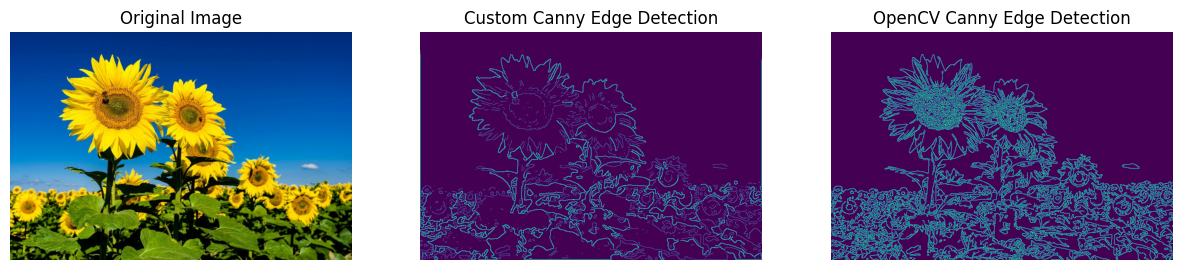

In [528]:
plotImage([[cv2.cvtColor(image, cv2.COLOR_BGR2RGB),"Original Image","3d"],[custom_edges,"Custom Canny Edge Detection","2d"],[opencv_edges,"OpenCV Canny Edge Detection","2d"]])

### Bonus Question: Limitations and Improvements

Discuss potential limitations of the Canny edge detection algorithm. Suggest how it could be improved for images with complex textures or lighting conditions.

